In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
from shapely import Point, Polygon, LineString
import folium # tutorial: https://python-visualization.github.io/folium/latest/getting_started.html
import mapclassify #tutorial: https://pysal.org/mapclassify/tutorial.html

In [3]:
from sodapy import Socrata #tutorial: https://github.com/mebauer/sodapy-tutorial-nyc-opendata

# DATOS DEL IDEAM

Ejemplo tomado de https://projectpythia.org/AtmosCol-2023/notebooks/2.acceso-datos/2.1.Estaciones.html

In [4]:
# conexión cliente usando socrata al repositorio de datos abiertos
client = Socrata("www.datos.gov.co", None)

### Variable y codigo

Dirección del viento: kiw7-v9ta

Nivel instantáneo: bdmn-sqnh

Temperatura Mínima del Aire: afdg-3zpb

Temperatura Máxima del Aire: ccvq-rp9s

Velocidad del Viento: sgfv-3yp8

Nivel Máximo: vfth-yucv

Nivel Mínimo: pt9a-aamx

Humedad del Aire: uext-mhny

Temperatura: sbwg-7ju4

Nivel del mar mínimo: 7z6g-yx9q

Nivel del mar máximo: uxy3-jchf

Nivel del mar: ia8x-22em

Presión Atmosferica: 62tk-nxj5

Precipitación: s54a-sgyg

In [5]:
# Solicitud de informacion al repositorio de interés
results = client.get(dataset_identifier="s54a-sgyg", limit=2000)

In [6]:
results

[{'codigoestacion': '0021195170',
  'codigosensor': '0240',
  'fechaobservacion': '2008-07-15T18:20:00.000',
  'valorobservado': '0',
  'nombreestacion': 'PAQUILO - AUT',
  'departamento': 'CUNDINAMARCA',
  'municipio': 'CABRERA',
  'zonahidrografica': 'ALTO MAGDALENA',
  'latitud': '3.993611111',
  'longitud': '-74.39805556',
  'descripcionsensor': 'Precipitacion',
  'unidadmedida': 'mm'},
 {'codigoestacion': '2403500085',
  'codigosensor': '0240',
  'fechaobservacion': '2019-08-14T00:30:00.000',
  'valorobservado': '0',
  'nombreestacion': 'SUSA - AUT',
  'departamento': 'SANTANDER',
  'municipio': 'ONZAGA',
  'zonahidrografica': 'SOGAMOSO',
  'latitud': '6.187794444',
  'longitud': '-72.835602778',
  'descripcionsensor': 'Precipitacion',
  'unidadmedida': 'mm'},
 {'codigoestacion': '0048015010',
  'codigosensor': '0240',
  'fechaobservacion': '2017-02-18T08:30:00.000',
  'valorobservado': '0',
  'nombreestacion': 'APTO VASQUEZ COBO TX GPRS/GOES',
  'departamento': 'AMAZONAS',
  'mun

In [7]:
# Convertimos resultados a dataframe
results_df = pd.DataFrame.from_records(results)

In [8]:
#Información de nuestro dataset
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   codigoestacion     2000 non-null   object
 1   codigosensor       2000 non-null   object
 2   fechaobservacion   2000 non-null   object
 3   valorobservado     2000 non-null   object
 4   nombreestacion     2000 non-null   object
 5   departamento       2000 non-null   object
 6   municipio          2000 non-null   object
 7   zonahidrografica   2000 non-null   object
 8   latitud            2000 non-null   object
 9   longitud           2000 non-null   object
 10  descripcionsensor  2000 non-null   object
 11  unidadmedida       2000 non-null   object
dtypes: object(12)
memory usage: 187.6+ KB


In [9]:
#Miremos las fechas
results_df.fechaobservacion

0       2008-07-15T18:20:00.000
1       2019-08-14T00:30:00.000
2       2017-02-18T08:30:00.000
3       2019-01-20T08:10:00.000
4       2019-04-13T07:10:00.000
                 ...           
1995    2014-07-31T20:40:00.000
1996    2018-10-12T14:15:00.000
1997    2019-03-02T17:10:00.000
1998    2018-07-23T18:10:00.000
1999    2019-07-26T15:10:00.000
Name: fechaobservacion, Length: 2000, dtype: object

In [10]:
#Miremos las estaciones
results_df.nombreestacion

0                        PAQUILO - AUT
1                           SUSA - AUT
2       APTO VASQUEZ COBO TX GPRS/GOES
3             PR CHOCO: APTO EL CARANO
4                      FLORENCIA - AUT
                     ...              
1995              ARRANCAPLUMAS  - AUT
1996                   PITALITO  - AUT
1997                        SAN ANDRES
1998        SAN PABLO DE BORBUR  - AUT
1999                   LA CABANA - AUT
Name: nombreestacion, Length: 2000, dtype: object

In [11]:
# Primeros registros

results_df.head(6)

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0021195170,0240,2008-07-15T18:20:00.000,0,PAQUILO - AUT,CUNDINAMARCA,CABRERA,ALTO MAGDALENA,3.993611111,-74.39805556,Precipitacion,mm
1,2403500085,0240,2019-08-14T00:30:00.000,0,SUSA - AUT,SANTANDER,ONZAGA,SOGAMOSO,6.187794444,-72.835602778,Precipitacion,mm
2,0048015010,0240,2017-02-18T08:30:00.000,0,APTO VASQUEZ COBO TX GPRS/GOES,AMAZONAS,LETICIA,<nil>,-4.194,-69.941,Precipitacion,mm
3,0011045010,0240,2019-01-20T08:10:00.000,4.5,PR CHOCO: APTO EL CARANO,CHOCO,QUIBDÓ,ATRATO - DARIÉN,5.691,-76.644,Precipitacion,mm
4,0044035040,0240,2019-04-13T07:10:00.000,0,FLORENCIA - AUT,CAQUETA,FLORENCIA,CAQUETÁ,1.733,-75.64502778,Precipitacion,mm
5,0035085070,0240,2018-08-29T10:30:00.000,0,SANTA MARIA - AUT,BOYACÁ,SANTA MARÍA,META,4.84125,-73.25669444,Precipitacion,mm


In [12]:
# Últimos registros
results_df.tail(3)

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
1997,0017019010,0240,2019-03-02T17:10:00.000,0,SAN ANDRES,SAN ANDRÉS PROVIDENCIA,SAN ANDRÉS,ISLAS CARIBE,12.556,-81.703,Precipitacion,mm
1998,0023125160,0240,2018-07-23T18:10:00.000,0,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556,Precipitacion,mm
1999,0016057030,0240,2019-07-26T15:10:00.000,0,LA CABANA - AUT,NORTE DE SANTANDER,OCAÑA,CATATUMBO,8.197805556,-73.31825,Precipitacion,mm


In [13]:
#Vamos a espacializarlas
results_gdf = gpd.GeoDataFrame(results_df, geometry=gpd.points_from_xy(results_df["longitud"], results_df["latitud"]),crs="EPSG:4326")

In [14]:
results_gdf.head(2)

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,geometry
0,0021195170,0240,2008-07-15T18:20:00.000,0,PAQUILO - AUT,CUNDINAMARCA,CABRERA,ALTO MAGDALENA,3.993611111,-74.39805556,Precipitacion,mm,POINT (-74.39806 3.99361)
1,2403500085,0240,2019-08-14T00:30:00.000,0,SUSA - AUT,SANTANDER,ONZAGA,SOGAMOSO,6.187794444,-72.835602778,Precipitacion,mm,POINT (-72.83560 6.18779)


In [15]:
results_gdf.explore(column="valorobservado", legend=True, color="black", marker_kwds=dict(radius=10, fill=True))

In [16]:
#Podemos pasar parámetros SQL como where, AND, IN, entre otros, en el método client.get
?client.get

Signature: client.get(dataset_identifier, content_type='json', **kwargs)
Docstring:
Read data from the requested resource. Options for content_type are json,
csv, and xml. Optionally, specify a keyword arg to filter results:

    select : the set of columns to be returned, defaults to *
    where : filters the rows to be returned, defaults to limit
    order : specifies the order of results
    group : column to group results on
    limit : max number of results to return, defaults to 1000
    offset : offset, used for paging. Defaults to 0
    q : performs a full text search for a value
    query : full SoQL query string, all as one parameter
    exclude_system_fields : defaults to true. If set to false, the
        response will include system fields (:id, :created_at, and
        :updated_at)

More information about the SoQL parameters can be found at the official
docs:
    http://dev.socrata.com/docs/queries.html

More information about system fields can be found here:
    http://d

In [16]:
# Solicitud de informacion para la estación de la Universidad Nacional - Bogotá - 0021205012
ppt_query = client.get(
    dataset_identifier="s54a-sgyg",
    select="fechaobservacion, valorobservado, codigoestacion",
    where="codigoestacion IN ('0021205012') \
                              AND fechaobservacion > '2017'",
)
df_est = pd.DataFrame.from_records(ppt_query)
df_est.head()

ReadTimeout: HTTPSConnectionPool(host='www.datos.gov.co', port=443): Read timed out. (read timeout=10)

In [18]:
df_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fechaobservacion  1000 non-null   object
 1   valorobservado    1000 non-null   object
 2   codigoestacion    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [19]:
#Convertimos la variable fechaobservacion a un dato de tipo tiempo
#Luego indexamos la variable 
df_est["fechaobservacion"] = pd.to_datetime(df_est["fechaobservacion"])
df_est.set_index("fechaobservacion", inplace=True)
df_est.valorobservado = df_est["valorobservado"].astype(float)
df_est = df_est.sort_index()
df_est.tail()

,valorobservado,codigoestacion
fechaobservacion,,
2019-08-24 08:50:00,0.0,0021205012
2019-08-26 11:30:00,0.0,0021205012
2019-08-26 14:00:00,0.0,0021205012
2019-08-27 16:00:00,0.0,0021205012
2019-08-27 19:20:00,0.0,0021205012


<Axes: xlabel='fechaobservacion'>

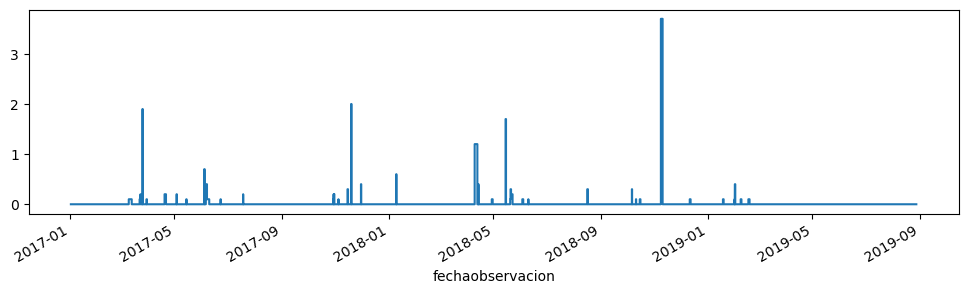

In [20]:
fig, ax = plt.subplots(figsize=(12, 3))
df_est["valorobservado"].plot(ax=ax, drawstyle="steps")

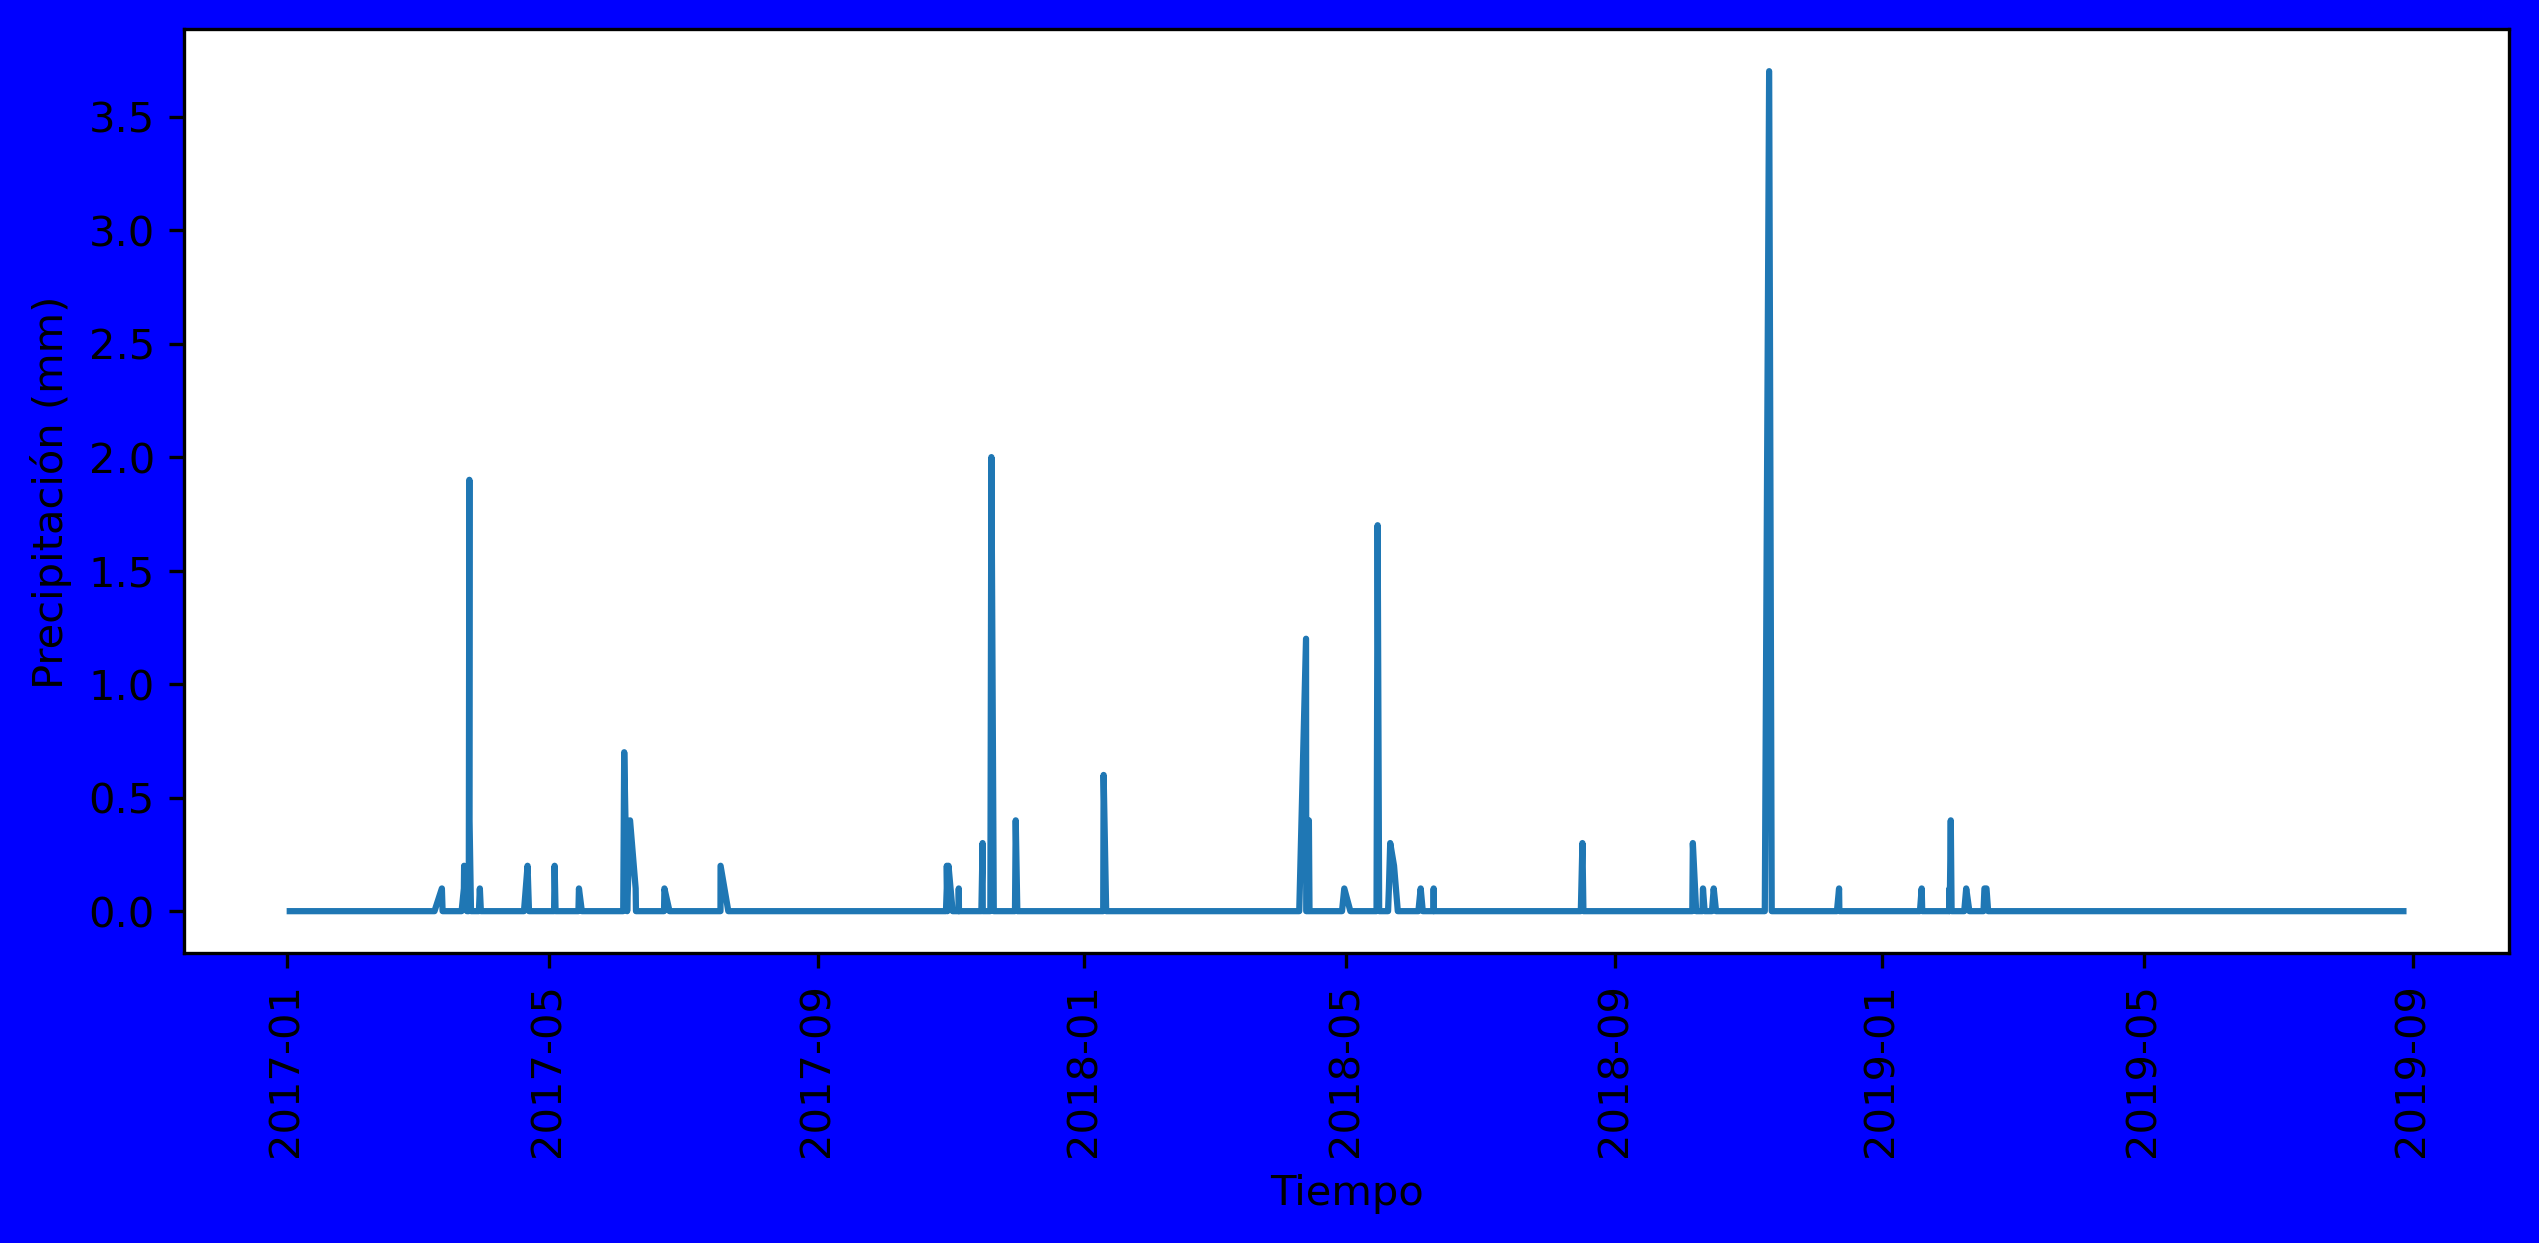

In [21]:
plt.figure(figsize=(10,4), dpi=300, edgecolor="r", facecolor="b")
plt.plot(df_est.index, df_est["valorobservado"])
plt.ylabel("Precipitación (mm)")
plt.xlabel("Tiempo")
plt.xticks(rotation=90)
plt.show()

In [22]:
#Podemos solicitar información para estaciones que reportan datos en el último mes
ppt_query = client.get(
    dataset_identifier="s54a-sgyg",
    select="fechaobservacion, valorobservado, codigoestacion, nombreestacion",
    where="fechaobservacion > '2023-09-11'",
)
df_ult = pd.DataFrame.from_records(ppt_query)
df_ult.head()

,fechaobservacion,valorobservado,codigoestacion,nombreestacion
0,2023-09-11T00:01:00.000,0,3502500135,GUAYABETAL POLLO OLIMPICO - AUT
1,2023-09-11T00:03:00.000,0,3502500135,GUAYABETAL POLLO OLIMPICO - AUT
2,2023-09-11T00:04:00.000,0,3502500135,GUAYABETAL POLLO OLIMPICO - AUT
3,2023-09-11T00:05:00.000,0,0026177030,LA VIRGINIA
4,2023-09-11T00:05:00.000,0,3502500135,GUAYABETAL POLLO OLIMPICO - AUT


# Datos en tiempo cuasi-real

In [23]:
import datetime

In [24]:
#dataset_identifier="57sv-p2fu"

time_now = datetime.datetime.now()
time = time_now - datetime.timedelta(days=10)
time

datetime.datetime(2024, 6, 24, 14, 4, 32, 122337)

In [25]:
#Convertimos la fecha en un str para incluirlo en la consulta

time_str = f"{pd.to_datetime(time):%Y-%m-%d}"
time_str

'2024-06-24'

In [26]:
#Realizamos la consulta

nrt_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="*",
    where="fechaobservacion >= '{}'".format(time_str),
    limit=2000,
)
df_nrt = pd.DataFrame.from_records(nrt_query)

In [27]:
df_nrt.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,0014015080,0071,2024-06-28T00:12:00.000,28.5,AEROPUERTO RAFAEL NUNEZ,BOLIVAR,CARTAGENA DE INDIAS,CARIBE - LITORAL,10.44725,-75.51602778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,0014015080,0111,2024-06-28T00:12:00.000,2.4,AEROPUERTO RAFAEL NUNEZ,BOLIVAR,CARTAGENA DE INDIAS,CARIBE - LITORAL,10.44725,-75.51602778,GPRS - VELOCIDAD DEL VIENTO,m/s,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,0014015080,0258,2024-06-28T00:12:00.000,1012.4,AEROPUERTO RAFAEL NUNEZ,BOLIVAR,CARTAGENA DE INDIAS,CARIBE - LITORAL,10.44725,-75.51602778,GPRS - PRESIÓN ATMOSFÉRICA,hPA,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,0014015080,0028,2024-06-28T00:12:00.000,79,AEROPUERTO RAFAEL NUNEZ,BOLIVAR,CARTAGENA DE INDIAS,CARIBE - LITORAL,10.44725,-75.51602778,GPRS - HUMEDAD DEL AIRE A 2 m,%,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,0014015080,0257,2024-06-28T00:12:00.000,0,AEROPUERTO RAFAEL NUNEZ,BOLIVAR,CARTAGENA DE INDIAS,CARIBE - LITORAL,10.44725,-75.51602778,GPRS - PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [28]:
# Consultemos por código de estación

cod_est = "0024035340"

In [29]:
aero_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="*",
    where="fechaobservacion >= '{}'\
                        AND codigoestacion IN ('{}')".format(
        time_str, cod_est
    ),
    limit=2000,
)
df_aero = pd.DataFrame.from_records(aero_query)

In [30]:
df_aero.head(10)

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,0024035340,0069,2024-07-03T14:00:00.000,21.3,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,0024035340,0070,2024-07-03T13:27:00.000,19.6,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,0024035340,0071,2024-07-03T14:08:00.000,21.9,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - TEMPERATURA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,0024035340,0028,2024-07-03T14:08:00.000,52,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - HUMEDAD DEL AIRE A 2 m,%,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,0024035340,0111,2024-07-03T14:08:00.000,3.7,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - VELOCIDAD DEL VIENTO,m/s,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
5,0024035340,0258,2024-07-03T14:08:00.000,756.9,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - PRESIÓN ATMOSFÉRICA,hPA,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
6,0024035340,0257,2024-07-03T14:08:00.000,0,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
7,0024035340,0258,2024-07-03T14:10:00.000,756.9,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - PRESIÓN ATMOSFÉRICA,hPA,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
8,0024035340,0111,2024-07-03T14:10:00.000,2.6,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - VELOCIDAD DEL VIENTO,m/s,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
9,0024035340,0071,2024-07-03T14:10:00.000,21.3,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667,GPRS - TEMPERATURA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [31]:
#Miremos los códigos de sensor que maneja esa estación
df_aero["codigosensor"].unique()

array(['0069', '0070', '0071', '0028', '0111', '0258', '0257', '0103',
       '0104', '0240', '0255', '0027', '0068'], dtype=object)

In [32]:
#Filtremos uno de los sensores
cod_sensor = "0071"

In [33]:
aero_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="fechaobservacion, valorobservado",
    where="fechaobservacion >= '{}'\
                        AND codigoestacion IN ('{}') \
                        AND codigosensor IN ('{}')".format(
        time_str, cod_est, cod_sensor
    ),
    limit=2000,
)
df_aero = pd.DataFrame.from_records(aero_query)

In [34]:
df_aero

,fechaobservacion,valorobservado
0,2024-07-03T14:08:00.000,21.9
1,2024-07-03T14:10:00.000,21.3
2,2024-07-03T14:12:00.000,21.2
3,2024-07-03T14:14:00.000,21.4
4,2024-07-03T14:16:00.000,21.2
...,...,...
663,2024-07-04T13:56:00.000,19.1
664,2024-07-04T13:58:00.000,19
665,2024-07-04T14:00:00.000,19
666,2024-07-04T14:02:00.000,19


In [35]:
from matplotlib.dates import DateFormatter, HourLocator

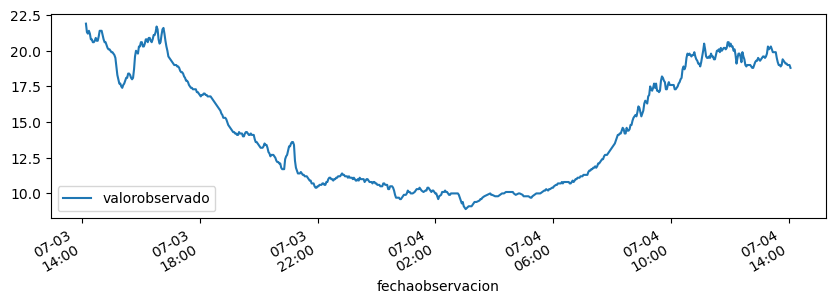

In [36]:
fig, ax = plt.subplots(figsize=(10, 3))
ax = plt.gca()
df_aero.index = pd.to_datetime(df_aero["fechaobservacion"])
df_aero.valorobservado = df_aero["valorobservado"].astype(float)
df_aero.plot(ax=ax)
ax.xaxis.set_major_locator(HourLocator(interval=4))  # tick every four hours
ax.xaxis.set_major_formatter(DateFormatter("%m-%d\n%H:%M"))